In [50]:
using LinearAlgebra
using FFTW
using ToeplitzMatrices
using SpecialMatrices
using Plots

In [60]:
#the input data
#T from a to b with δt as step
a = -4.0
δt = 0.01
b = 7
T = a:δt:b
Y = T.^3 - 5*T.^2 -T
N = length(Y)
L = floor(Int, N/2)
M = 5

##############################################################################################
#the algorithm

    #Hankel(first col, lasr row)
Y1 = Hankel(Y[1:N-L-1] ,Y[N-L-1:N-1])
Y2 = Hankel(Y[2:N-L] ,Y[N-L:N])
s = svd(pinv(I(N-L-1)Y1))                           #assuming svd transform of a matrix is unique!(but it could be a problem!)
Ze = diagm(s.S)*s.Vt*Y2*s.U
z = eigen(Ze).values
S = log.(z)/δt
zm = z[end-(M-1):end]
#building up the rectangular vandermond matrix





5-element Vector{ComplexF64}:
 4.4084118447289515e-32 + 6.640739113255607e-33im
     0.9999958773337796 - 4.121914510487799e-6im
     0.9999958773337796 + 4.121914510487799e-6im
     1.0000041226662224 - 4.12341704177313e-6im
     1.0000041226662224 + 4.12341704177313e-6im

In [62]:
Vandermonde(zm)

5×5 Vandermonde{ComplexF64}:
 1.0+0.0im  4.40841e-32+6.64074e-33im  …  3.26457e-126+2.2241e-126im
 1.0+0.0im     0.999996-4.12191e-6im          0.999984-1.64875e-5im
 1.0+0.0im     0.999996+4.12191e-6im          0.999984+1.64875e-5im
 1.0+0.0im          1.0-4.12342e-6im           1.00002-1.64939e-5im
 1.0+0.0im          1.0+4.12342e-6im           1.00002+1.64939e-5im

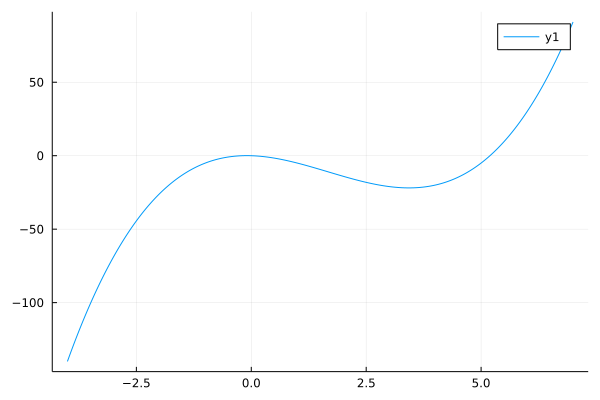

In [21]:
plot(T,Y)

In [22]:
X = -4.0:0.001:7
Y = X.^3 - 5*X.^2 -X

11001-element Vector{Float64}:
 -140.0
 -139.913016999
 -139.82606799200002
 -139.739152973
 -139.652271936
 -139.56542487500002
 -139.478611784
 -139.391832657
 -139.305087488
 -139.21837627099998
 -139.13169900000003
 -139.045055669
 -138.958446272
    ⋮
   90.165934669
   90.24159900000002
   90.31729527099999
   90.393023488
   90.46878365700005
   90.54457578399999
   90.62039987499998
   90.69625593600001
   90.77214397299996
   90.84806399200004
   90.924015999
   91.0

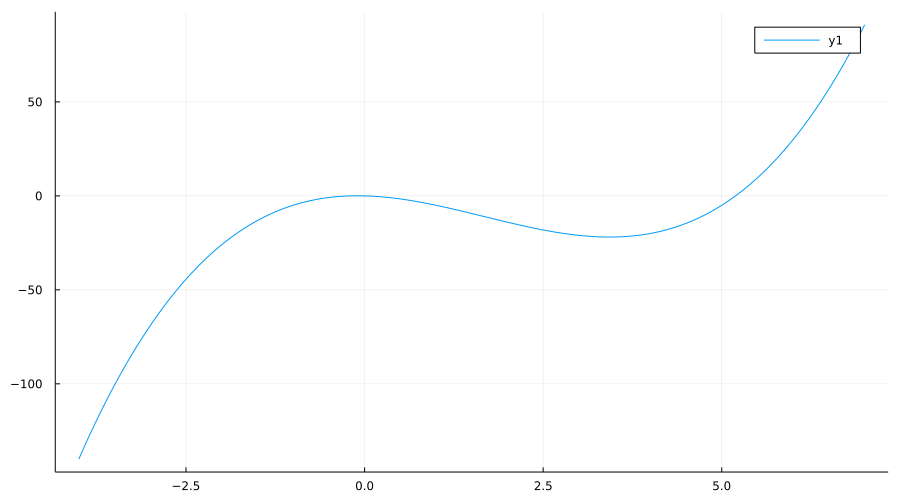

In [23]:
plot(X,Y)
plot!(size=(900,500))

In [71]:
a = [1;3;4;6;7;8;9;55]

8-element Vector{Int64}:
  1
  3
  4
  6
  7
  8
  9
 55

In [79]:
v = Vandermonde(a[2:5])

4×4 Vandermonde{Int64}:
 1  3   9   27
 1  4  16   64
 1  6  36  216
 1  7  49  343

In [80]:
[v diagm(a[3:5].^4)*v ]

LoadError: DimensionMismatch("matrix A has dimensions (3,3), matrix B has dimensions (4,4)")